In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

plik_towary = "/content/drive/MyDrive/Colab Notebooks/towary.txt"

def wczytaj_towary():
    if not os.path.exists(plik_towary):
        return []
    with open(plik_towary, "r", encoding="utf-8") as f:
        return [linia.strip() for linia in f.readlines()]

def zapisz_towary(towary):
    with open(plik_towary, "w", encoding="utf-8") as f:
        for towar in towary:
            f.write(towar + "\n")

def pokaz_towary():
  print(towary)

def dostawa():
  x = input("Podaj nazwę towaru przyjmowanego ")
  towary.append(x)
  zapisz_towary(towary)

def wydanie():
  y = input("Podaj nazwę towaru usuwanego ")
  if y in towary:
    towary.remove(y)
    zapisz_towary(towary)
  else:
    print("Towar nie znajduje się na liscie, proszę wybrać towar z powyższej listy")
  pokaz_towary()

def remanent():
  print(f"Liczba sztuk: {len(towary)}")

def zapas():
  t = input("Podaj nazwę towaru: ")
  liczba = sum(1 for towar in towary if towar == t)
  print(f"Liczba sztuk towaru {t} wynosi {liczba} sztuk")

pokaz_towary()
def menu():
  towary = wczytaj_towary()
  pokaz_towary()
while True:
  decyzja = input("Podaj D, jeżeli dostawa, W, jeżeli wydanie, S, jeśli koniec, R jeśli remament, Z jeśli zapas").upper()
  match decyzja:
    case "D":
      dostawa()
    case "W":
      wydanie()
    case "S":
      print("Koniec.")
      break
    case "R":
      remanent()
    case "Z":
      zapas()
    case _:
      print("Nieznana operacja, spróbuj ponownie")

  menu()

['sok', 'długopis', 'zeszyt', 'bułka', 'hot-dog', 'piwo', 'szczotka', 'chleb', 'chleb', 'chleb']


KeyboardInterrupt: Interrupted by user

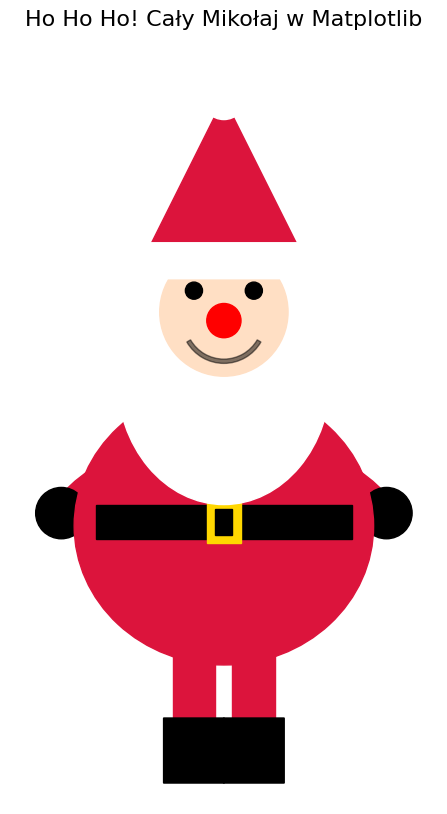

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# --- Konfiguracja płótna ---
fig, ax = plt.subplots(figsize=(6, 10)) # Zwiększamy wysokość figury

# ZMIANA: Rozszerzamy zakres osi Y w dół, aby zmieścić ciało i nogi
ax.set_xlim(0, 100)
ax.set_ylim(-50, 130)

# Ważne: aspect='equal' sprawia, że koła są okrągłe, a nie spłaszczone
ax.set_aspect('equal')
# Ukrywamy osie, żeby wyglądało jak rysunek, a nie wykres
ax.axis('off')
ax.set_title("Ho Ho Ho! Cały Mikołaj w Matplotlib", fontsize=16)

# --- Definiowanie kolorów ---
SKIN_COLOR = '#FFDFC4' # jasny cielisty
BEARD_COLOR = 'white'
HAT_COLOR = 'crimson' # głęboka czerwień
NOSE_COLOR = 'red'
BELT_COLOR = 'black'
BUCKLE_COLOR = 'gold'
BOOT_COLOR = 'black'

# --- RYSOWANIE ELEMENTÓW (od najdalszego planu do najbliższego - zorder) ---

# --- WARSTWA -2: NOGI I RĘCE (Najgłębiej w tle) ---

# Nogi (Dwa czerwone prostokąty)
leg_left = patches.Rectangle((38, -30), 10, 30, color=HAT_COLOR, zorder=-2)
leg_right = patches.Rectangle((52, -30), 10, 30, color=HAT_COLOR, zorder=-2)
ax.add_patch(leg_left)
ax.add_patch(leg_right)

# Ręce (Dwie obrócone elipsy)
# Ellipse((x,y), width, height, angle...)
arm_left = patches.Ellipse((25, 25), 35, 12, angle=30, color=HAT_COLOR, zorder=-2)
arm_right = patches.Ellipse((75, 25), 35, 12, angle=-30, color=HAT_COLOR, zorder=-2)
ax.add_patch(arm_left)
ax.add_patch(arm_right)

# Rękawice (Czarne kółka na końcach rąk)
mitten_left = patches.Circle((12, 18), 6, color=BOOT_COLOR, zorder=-2)
mitten_right = patches.Circle((88, 18), 6, color=BOOT_COLOR, zorder=-2)
ax.add_patch(mitten_left)
ax.add_patch(mitten_right)


# --- WARSTWA -1: BUTY ---
# Zaokrąglone prostokąty na dole nóg
boot_left = patches.FancyBboxPatch((36, -45), 14, 15, boxstyle="round,pad=0.1", color=BOOT_COLOR, zorder=-1)
boot_right = patches.FancyBboxPatch((50, -45), 14, 15, boxstyle="round,pad=0.1", color=BOOT_COLOR, zorder=-1)
ax.add_patch(boot_left)
ax.add_patch(boot_right)


# --- WARSTWA 0: TUŁÓW I PAS (Bezpośrednio pod brodą) ---

# Tułów (Duża czerwona elipsa, żeby był puszysty)
# Umieszczamy środek niżej niż głowę (y=15)
body = patches.Ellipse((50, 15), 70, 65, color=HAT_COLOR, zorder=0)
ax.add_patch(body)

# Pas (Czarny prostokąt)
belt = patches.Rectangle((20, 12), 60, 8, color=BELT_COLOR, zorder=0.1)
ax.add_patch(belt)

# Klamra pasa (Złoty prostokąt z dziurką w środku)
buckle_outer = patches.Rectangle((46, 11), 8, 10, color=BUCKLE_COLOR, zorder=0.2)
buckle_inner = patches.Rectangle((48, 13), 4, 6, color=BELT_COLOR, zorder=0.3) # "dziurka" w kolorze pasa
ax.add_patch(buckle_outer)
ax.add_patch(buckle_inner)


# --- WARSTWA 1-6: GŁOWA (Oryginalny kod) ---

# 1. Broda (Duża biała elipsa na dole)
# Zwróć uwagę: zorder=1 sprawia, że broda przykrywa górę tułowia
beard = patches.Ellipse((50, 50), 50, 60, angle=0, color=BEARD_COLOR, zorder=1)
ax.add_patch(beard)

# 2. Twarz (Koło cieliste)
face = patches.Circle((50, 65), 15, color=SKIN_COLOR, zorder=2)
ax.add_patch(face)

# 3. Czapka - Czerwona część (Trójkąt/Wielokąt)
hat_triangle_coords = [[30, 75], [70, 75], [50, 115]]
hat_main = patches.Polygon(hat_triangle_coords, closed=True, color=HAT_COLOR, zorder=3)
ax.add_patch(hat_main)

# 4. Czapka - Biały otok na dole czapki (Zaokrąglony prostokąt)
hat_trim = patches.FancyBboxPatch((30, 73), 40, 8, boxstyle="round,pad=0.2", color=BEARD_COLOR, zorder=4)
ax.add_patch(hat_trim)

# 5. Czapka - Pompon (Małe białe koło na szczycie)
pom_pom = patches.Circle((50, 115), 5, color=BEARD_COLOR, zorder=4)
ax.add_patch(pom_pom)

# 6. Oczy (Dwa małe czarne koła)
eye_left = patches.Circle((43, 70), 2, color='black', zorder=5)
eye_right = patches.Circle((57, 70), 2, color='black', zorder=5)
ax.add_patch(eye_left)
ax.add_patch(eye_right)

# 7. Nos (Czerwone koło na środku twarzy)
nose = patches.Circle((50, 63), 4, color=NOSE_COLOR, zorder=6)
ax.add_patch(nose)

# 8. Uśmiech (Łuk)
smile = patches.Wedge((50, 63), 10, 210, 330, width=1, color='black', alpha=0.5, zorder=5)
ax.add_patch(smile)


# --- Wyświetlenie rysunku ---
plt.show()